In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris(as_frame=True)
iris_X, iris_y = iris.data, iris.target

# subsample to a third of the data points
iris_X = iris_X.loc[::4]
iris_y = iris_y.loc[::4]

# create a binary classification dataset with labels +/- 1
iris_y2 = iris_y.copy()
iris_y2[iris_y2==2] = 1
iris_y2[iris_y2==0] = -1

# print part of the dataset
pd.concat([iris_X, iris_y2], axis=1).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,-1
4,5.0,3.6,1.4,0.2,-1
8,4.4,2.9,1.4,0.2,-1
12,4.8,3.0,1.4,0.1,-1
16,5.4,3.9,1.3,0.4,-1


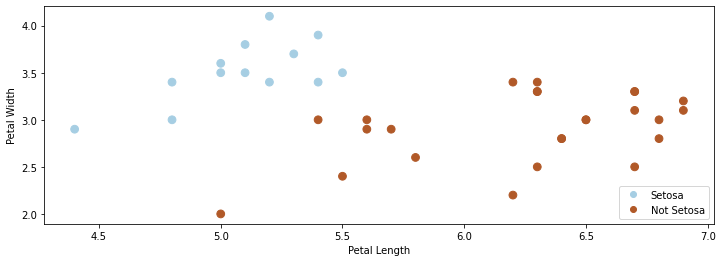

In [2]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
import warnings
warnings.filterwarnings("ignore")

# create 2d version of dataset and subsample it
X = iris_X.to_numpy()[:,:2]
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

# Plot also the training points
p1 = plt.scatter(X[:, 0], X[:, 1], c=iris_y2, s=60, cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Not Setosa'], loc='lower right')


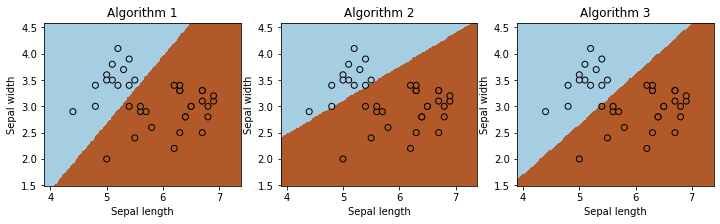

In [5]:
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier
models = [LogisticRegression(), Perceptron(), RidgeClassifier()]

def fit_and_create_boundary(model):
    model.fit(X, iris_y2)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return Z

# Create a grid of subplots
plt.figure(figsize=(12, 3))
for i, model in enumerate(models):
    plt.subplot(1, 3, i + 1)  # 1 row, 3 columns, subplot index (i+1)
    Z = fit_and_create_boundary(model)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
    # Add other plot settings or labels as needed
    plt.title(f"Model {i+1}")
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=iris_y2, edgecolors='k', cmap=plt.cm.Paired)
    plt.title('Algorithm %d' % (i+1))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')


# Show the subplots
plt.show()


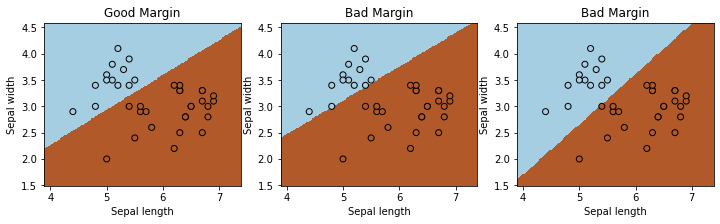

In [9]:
from sklearn.linear_model import Perceptron, RidgeClassifier
from sklearn.svm import SVC
models = [SVC(kernel='linear', C=10000), Perceptron(), RidgeClassifier()]

def fit_and_create_boundary(model):
    model.fit(X, iris_y2)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return Z

# Create a grid of subplots
plt.figure(figsize=(12, 3))
for i, model in enumerate(models):
    plt.subplot(1, 3, i + 1)  # 1 row, 3 columns, subplot index (i+1)
    Z = fit_and_create_boundary(model)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
    # Add other plot settings or labels as needed
    plt.title(f"Model {i+1}")
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=iris_y2, edgecolors='k', cmap=plt.cm.Paired)
    if i == 0:
        plt.title('Good Margin')
    else:
        plt.title('Bad Margin')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

plt.show()

(2.25, 4.0)

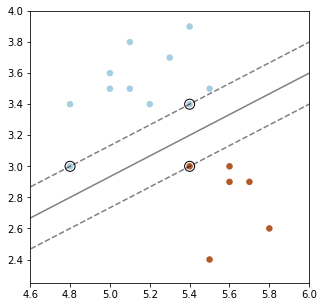

In [10]:
#https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
from sklearn import svm

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000) # we'll explain this algorithm shortly
clf.fit(X, iris_y2)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=iris_y2, s=30, cmap=plt.cm.Paired)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlim([4.6, 6])
plt.ylim([2.25, 4])

#### Geometric Intuitions

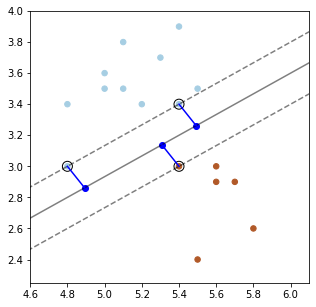

In [12]:
# plot decision boundary and margins
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=iris_y2, s=30, cmap=plt.cm.Paired)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlim([4.6, 6.1])
plt.ylim([2.25, 4])

# plot margin vectors
theta = clf.coef_[0]
theta0 = clf.intercept_
for idx in clf.support_[:3]:
    x0 = X[idx]
    y0 = iris_y2.iloc[idx]
    margin_x0 = (theta.dot(x0) + theta0)[0] / np.linalg.norm(theta)
    w = theta / np.linalg.norm(theta)
    plt.plot([x0[0], x0[0]-w[0]*margin_x0], [x0[1], x0[1]-w[1]*margin_x0], color='blue')
    plt.scatter([x0[0]-w[0]*margin_x0], [x0[1]-w[1]*margin_x0], color='blue')
plt.show()

#### The Hinge Loss

Text(0, 0.5, 'L(y=1,f)')

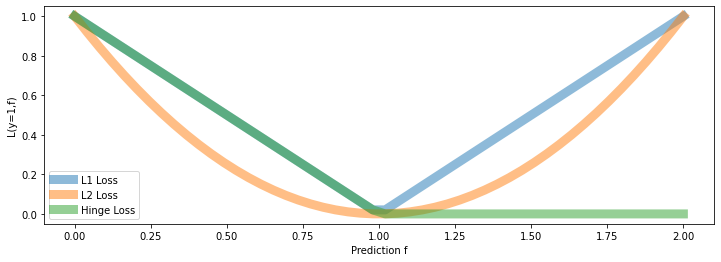

In [13]:
# define the losses for a target of y=1
hinge_loss = lambda f: np.maximum(1 - f, 0)
l2_loss = lambda f: (1-f)**2
l1_loss = lambda f: np.abs(f-1)

# plot them
fs = np.linspace(0, 2)
plt.plot(fs, l1_loss(fs), fs, l2_loss(fs), fs, hinge_loss(fs), linewidth=9, alpha=0.5)
plt.legend(['L1 Loss', 'L2 Loss', 'Hinge Loss'])
plt.xlabel('Prediction f')
plt.ylabel('L(y=1,f)')

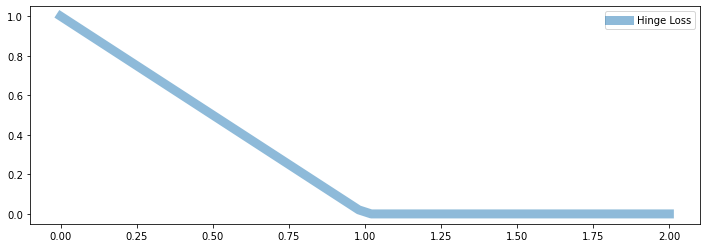

In [14]:
plt.plot(fs, hinge_loss(fs), linewidth=9, alpha=0.5)
plt.legend(['Hinge Loss'])